## KNN 실습 - Toy Example
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [3]:
# Toy Example 불러오기
import mglearn
X, Y = mglearn.datasets.make_forge()

In [4]:
# 독립변수 확인
print(X)
print(X.shape)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
(26, 2)


In [5]:
# 종속변수 확인
print(Y)
print(Y.shape)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26,)


forge 데이터 산점도


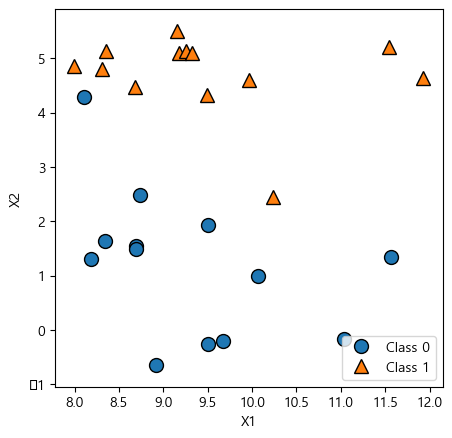

In [6]:
# 산점도 그리기
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (5, 5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('X1')
plt.ylabel('X2')
print('forge 데이터 산점도')

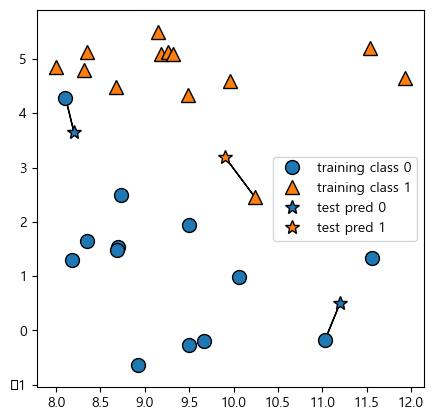

In [7]:
# K = 1의 경우
mglearn.plots.plot_knn_classification(n_neighbors = 1)

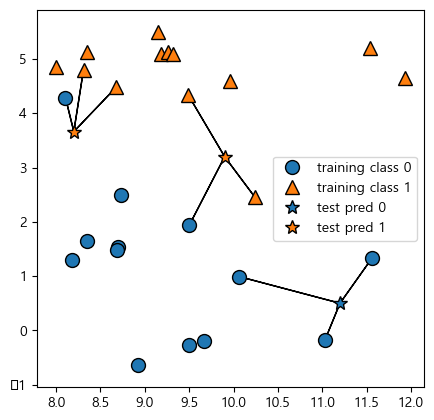

In [8]:
# K = 3의 경우
mglearn.plots.plot_knn_classification(n_neighbors = 3)

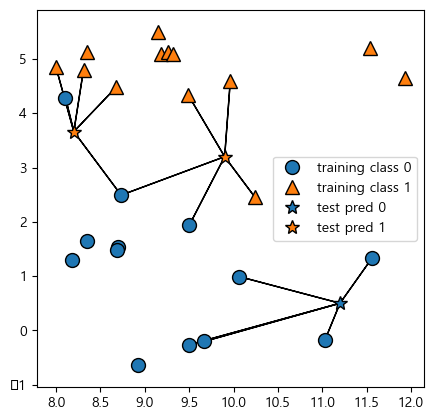

In [9]:
# K = 5의 경우
mglearn.plots.plot_knn_classification(n_neighbors = 5)

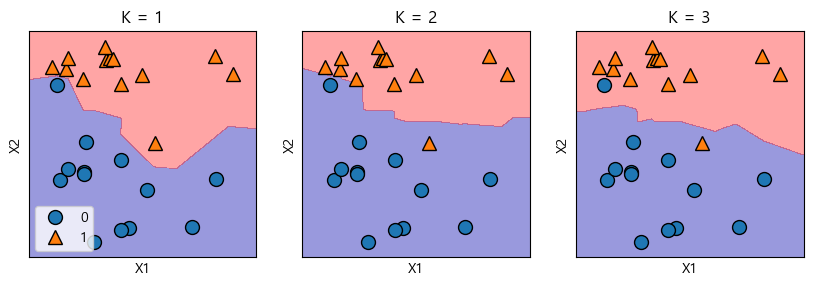

In [11]:
# 모형 결정 경계선 확인
from sklearn import neighbors

fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([1, 2, 3], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    
axes[0].legend(loc = 3)

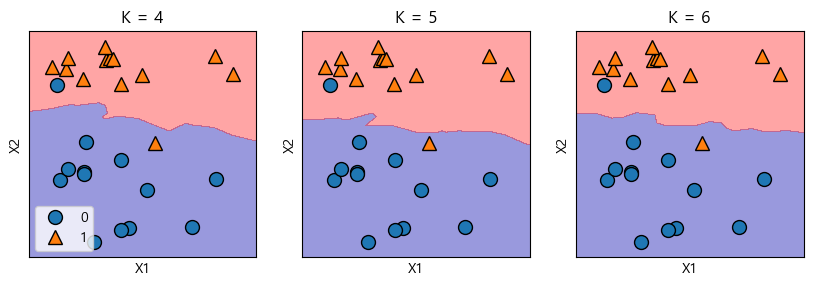

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([4, 5, 6], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    
axes[0].legend(loc = 3)

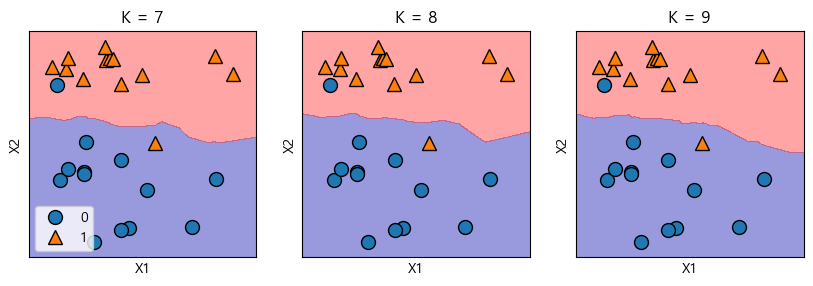

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([7, 8, 9], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    
axes[0].legend(loc = 3)

## KNN 실습 - Personal Loan 데이터셋
---
#### 데이터 설명

* 독립변수
 - ID: 고객 ID
 - Age: 고객 나이
 - Experience: 고고객 직업 경험 수행기간
 - Income: 연간 고객의 수입
 - ZIPCode: 고객의 주소 ZIP 코드
 - Family: 고객의 가구수
 - CCAvg : 월 평균 고객의 신용카드 사용금액
 - Education: 고객의 교육수준 1: Undergrad; 2: Graduate; 3: Advanced/Professional
 - Mortgage: 고객의 주택 담보 가치
 - Securities Account: 고객의 증권계좌 보유여부
 - CD Account: 고객의 예금증서 보유 여부
 - Online: 고객의 온라인뱅킹 여부
 - CreditCard: 고객의 신용카드 발급여부

* 종속변수
 - Personal Loan(대출여부): 1 or 0

In [14]:
ploan = pd.read_csv('C:/Users/s/Desktop/ml/data/PersonalLoan.csv')
ploan.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [15]:
# 미사용 변수, NA 제거
ploan_knn_df = ploan.dropna().drop(['ID', 'ZIP Code'], axis = 1, inplace = False)

In [16]:
# 독립변수와 종속변수 제거
feature_columns = list(ploan_knn_df.columns.difference(['Personal Loan']))
X = ploan_knn_df[feature_columns]
Y = ploan_knn_df['Personal Loan']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, train_size = 0.7, test_size = 0.3, random_state = 1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [20]:
import sklearn.preprocessing as preprocessing

In [21]:
# 변수 값 정규화
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [22]:
from sklearn import neighbors

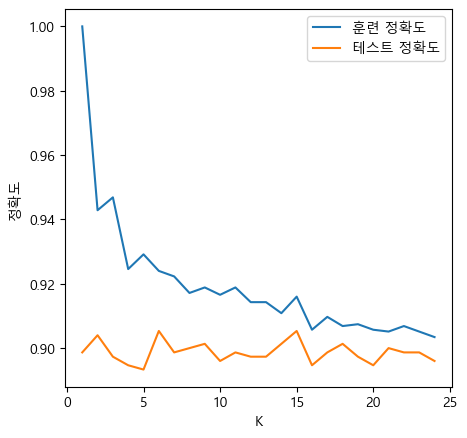

In [23]:
training_accuracy = []
test_accuracy = []
# 여러 K 값에 대한 모델 생성 n_neighbors를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    ploan_knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    ploan_knn.fit(X_train, Y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(ploan_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_accuracy.append(ploan_knn.score(X_test, Y_test))

# K의 변화량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_accuracy, label="훈련 정확도")
plt.plot(k_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("K")
plt.legend()

In [24]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_accuracy == max(test_accuracy)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K 값:', best_k)

최적의 K 값: 6


In [25]:
# 최적의 K 값에서 테스트 데이터의 Y 예측값
best_ploan_knn = neighbors.KNeighborsClassifier(n_neighbors = best_k)
best_ploan_knn.fit(X_train, Y_train)
best_ploan_knn.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
n_test = len(Y_test)
Y_predict = best_ploan_knn.predict(X_test)

print('테스트 데이터 개수:', n_test)
print('예측과 일치한 데이터 개수:', sum(Y_test == Y_predict))
print('일치 비율:', round(sum(Y_test == Y_predict) / n_test * 100, 2), '%')

테스트 데이터 개수: 750
예측과 일치한 데이터 개수: 679
일치 비율: 90.53 %


### 성능평가지표 - 오차행렬(Confusion Matrix)
---

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [28]:
# 오차 행렬(Confusion Matrix)를 통해 최적의 K에서의 예측 성능 확인
confusion_matrix(Y_test, Y_predict)

array([[660,  13],
       [ 58,  19]], dtype=int64)

In [29]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

In [30]:
result_mat = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'], index =['KNN_best'])
result_mat.loc['KNN_best']=[accuracy, precision, recall, f1]
result_mat

,accuracy,precision,recall,f1
KNN_best,0.905333,0.59375,0.246753,0.348624
